<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Simple Pendulum

### Examples - Mechanics
<section class="post-meta">
By Jonas Tjemsland, Eilif Sommer Øyre and Jon Andreas Støvneng
</section>
Last edited: April 10th 2018
___

## Introduction

In this notebook we will discuss the *simple pendulum* which is a simple and idealised model of the real pendulum. It consists of a point mass $m$ suspended by an unstretchable, massless string (or rod) of length $L$, as shown in the figure [1](#im1). The pendulum only moves in one plane and there is no friction. Let $\theta$ denote the angle between the vertical axis and the string, such that $\theta=0$ at equilibrium. Note that the position of the pendulum can be specified using only $\theta$. If we pull the mass to one side and let it go, it will start to to oscillate around the equilibrium, similar to a wrecking ball.

There are two forces acting on the mass: the gravitaional force $\mathbf{F} = m\mathbf{g}$ and the pull from the string $\mathbf{S}$. The forces can be decomposed into a direction along the string (radial direction, $\hat r$) and a direction along the path of the point mass (azimuthal direction, $\hat \theta$). Since the string is assumed to be unstretchable, only the gravitational pull in the azimuthal direction, $\mathbf F_\theta$, will contribute to the motion of the pendulum. The gravitational force in the radial direction, $\mathbf F_r$, is cancelled by the pull from the string: $\mathbf F_r = - \mathbf{S}$. From figure [1](#im1), it is clear that
\begin{equation}
F_\theta = -mg\sin\theta.
\end{equation}

We will now use Newton's second law, $\mathbf{F}=m\mathbf{a}$, to find an differential equation describing the motion of the pendulum. Let $t$ denote the time. The acceleration of the point mass can be expressed by
\begin{equation}
\mathbf{a} = \frac{\mathrm{d}^2\theta}{\mathrm{d} t^2}\;\hat \theta = L\ddot \theta\;\hat \theta.
\end{equation}
The motion of the pendulum is thus described by the equation
\begin{equation}
L\ddot \theta = L\frac{\mathrm{d}^2\theta}{\mathrm{d} t^2} = -g\sin\theta.
\label{eq:diff}
\end{equation}

![Simple Pendulum](pendulum.png)
**Figure 1:** *The simple pendulum with mass $m$ and displacement angle $\theta$. The gravitational force is decomposed in azimuthal and radial direction.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
figsize = (12, 5)
dpi = 600    # Resolution in dots per inch

## Analytical Approximation
Equation \ref{eq:diff} cannot be solved analytically. However, note that $\sin\theta\approx \theta$ for $\theta \ll 1$. Thus, for small angles, the motion can be approximated by
\begin{equation}
L\ddot \theta \approx -g\theta,
\end{equation}
which has the simple solution
\begin{equation}
\theta=\theta_0\cos(\omega t),
\end{equation}
where $\theta_0$ is the initial posision at time $t=0$ and $\omega=\sqrt{g/L}$ is the angular frequency. This is known as a harmonic oscillation. The period of the oscillation is $T=2\pi/\omega=2\pi\sqrt{L/g}$.

## Numerical Solution
We will now solve equation \eqref{eq:diff} numerically. To this end, we will use the [Euler method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb). This is a first order method used to solve ordinary differential equations. There exists far superior methods, but Euler's explicit method is the simplest and the easiest to understand. You are welcome to implement a more advanced and more accurate method such as the fourth order [Runge-Kutta method](https://www.numfys.net/search/?q=runge-kutta).

We need to write equation \eqref{eq:diff} on a form which more easily can be evaluated by the computer. We start by decoupling the second order differential equation into two first order equations by introducing the angular velocity $\omega = \dot \theta$:
\begin{equation}
\begin{aligned}
\mathrm{d}\omega &= -\frac{g}{L}\sin\theta\,\mathrm{d}t,\\
\mathrm{d}\theta &= \omega\;\mathrm{d} t.
\end{aligned}\label{eq:numdiff}
\end{equation}
The computer cannot comprehend infinitesimal values and we thus need to approximate them as finite (but small), $\mathrm d \theta \approx \Delta \theta$. The smaller the values, the more accurate the method is.

The algorithm for the Euler method should now be apparent. We start at some initial position $\theta=\theta_0$ at time $t=0$, choose a small timestep $\Delta t$ and use equation \eqref{eq:numdiff} to find the position at time $\Delta t$. By repeating this procedure $n$ times, we can find the position at any time $t=n\Delta t$.

Let's consider the [Foucault pendulum* located at NTNU](https://www.ntnu.no/fysikk/foucault) in Trondheim. It consists of a $40\;\mathrm{kg}$ steel ball with a radius $r=10\;\mathrm{cm}$ suspended by a $25\;\mathrm{m}$ steel wire. The pendulum is driven by an electromagnet located below the pendulum, which makes sure that it never stops to oscillate. The period of this for small amplitudes $T=2\pi\sqrt{L/g}=10\;\mathrm{s}$. We also measured the period ourselves. The result was $T=10.1\;\mathrm{s}$.

In [2]:
g = 9.81 # m/s^2
L = 25   # m
m = 40   # kg

def approx(t, theta0):
    """ Evaluates the analytical approximation. """
    return theta0*np.cos(t*(g/L)**.5)

def RHS(theta, w, dt):
    """ Return the right hand side of the 
    ordinary differential equation describing
    a simple pendulum.
    """
    dw = -np.sin(theta)*dt*g/L
    dtheta = w*dt
    return dtheta, dw

def euler_step(theta, w, dt):
    """ Performs one step of the Euler method. """
    dtheta, dw = RHS(theta, w, dt)
    w = w + dw
    theta = theta + dtheta
    return theta, w

def euler_method(theta0, w0, dt, n):
    """ Performs the Euler method. """
    theta = (n + 1)*[0]
    w = (n + 1)*[0]
    
    theta[0] = theta0
    w[0] = w0
    for i in range(n):
        theta[i + 1], w[i + 1] = euler_step(theta[i], w[i], dt) 
    
    return theta, w

We can now perform the Euler method and plot the result. Let's plot the angle for two different initial angles $\theta=\{15^\circ, 60^\circ\}=\{\pi/6, \pi/3\}$ and compare with the analytical approximation.

In [3]:
theta01 = np.pi/12
theta02 = np.pi/3
T = 20
n = 10000
t = np.linspace(0, T, n + 1)
dt = T/float(n)

theta1, w1 = euler_method(theta01, 0, dt, n)
theta2, w2 = euler_method(theta02, 0, dt, n)

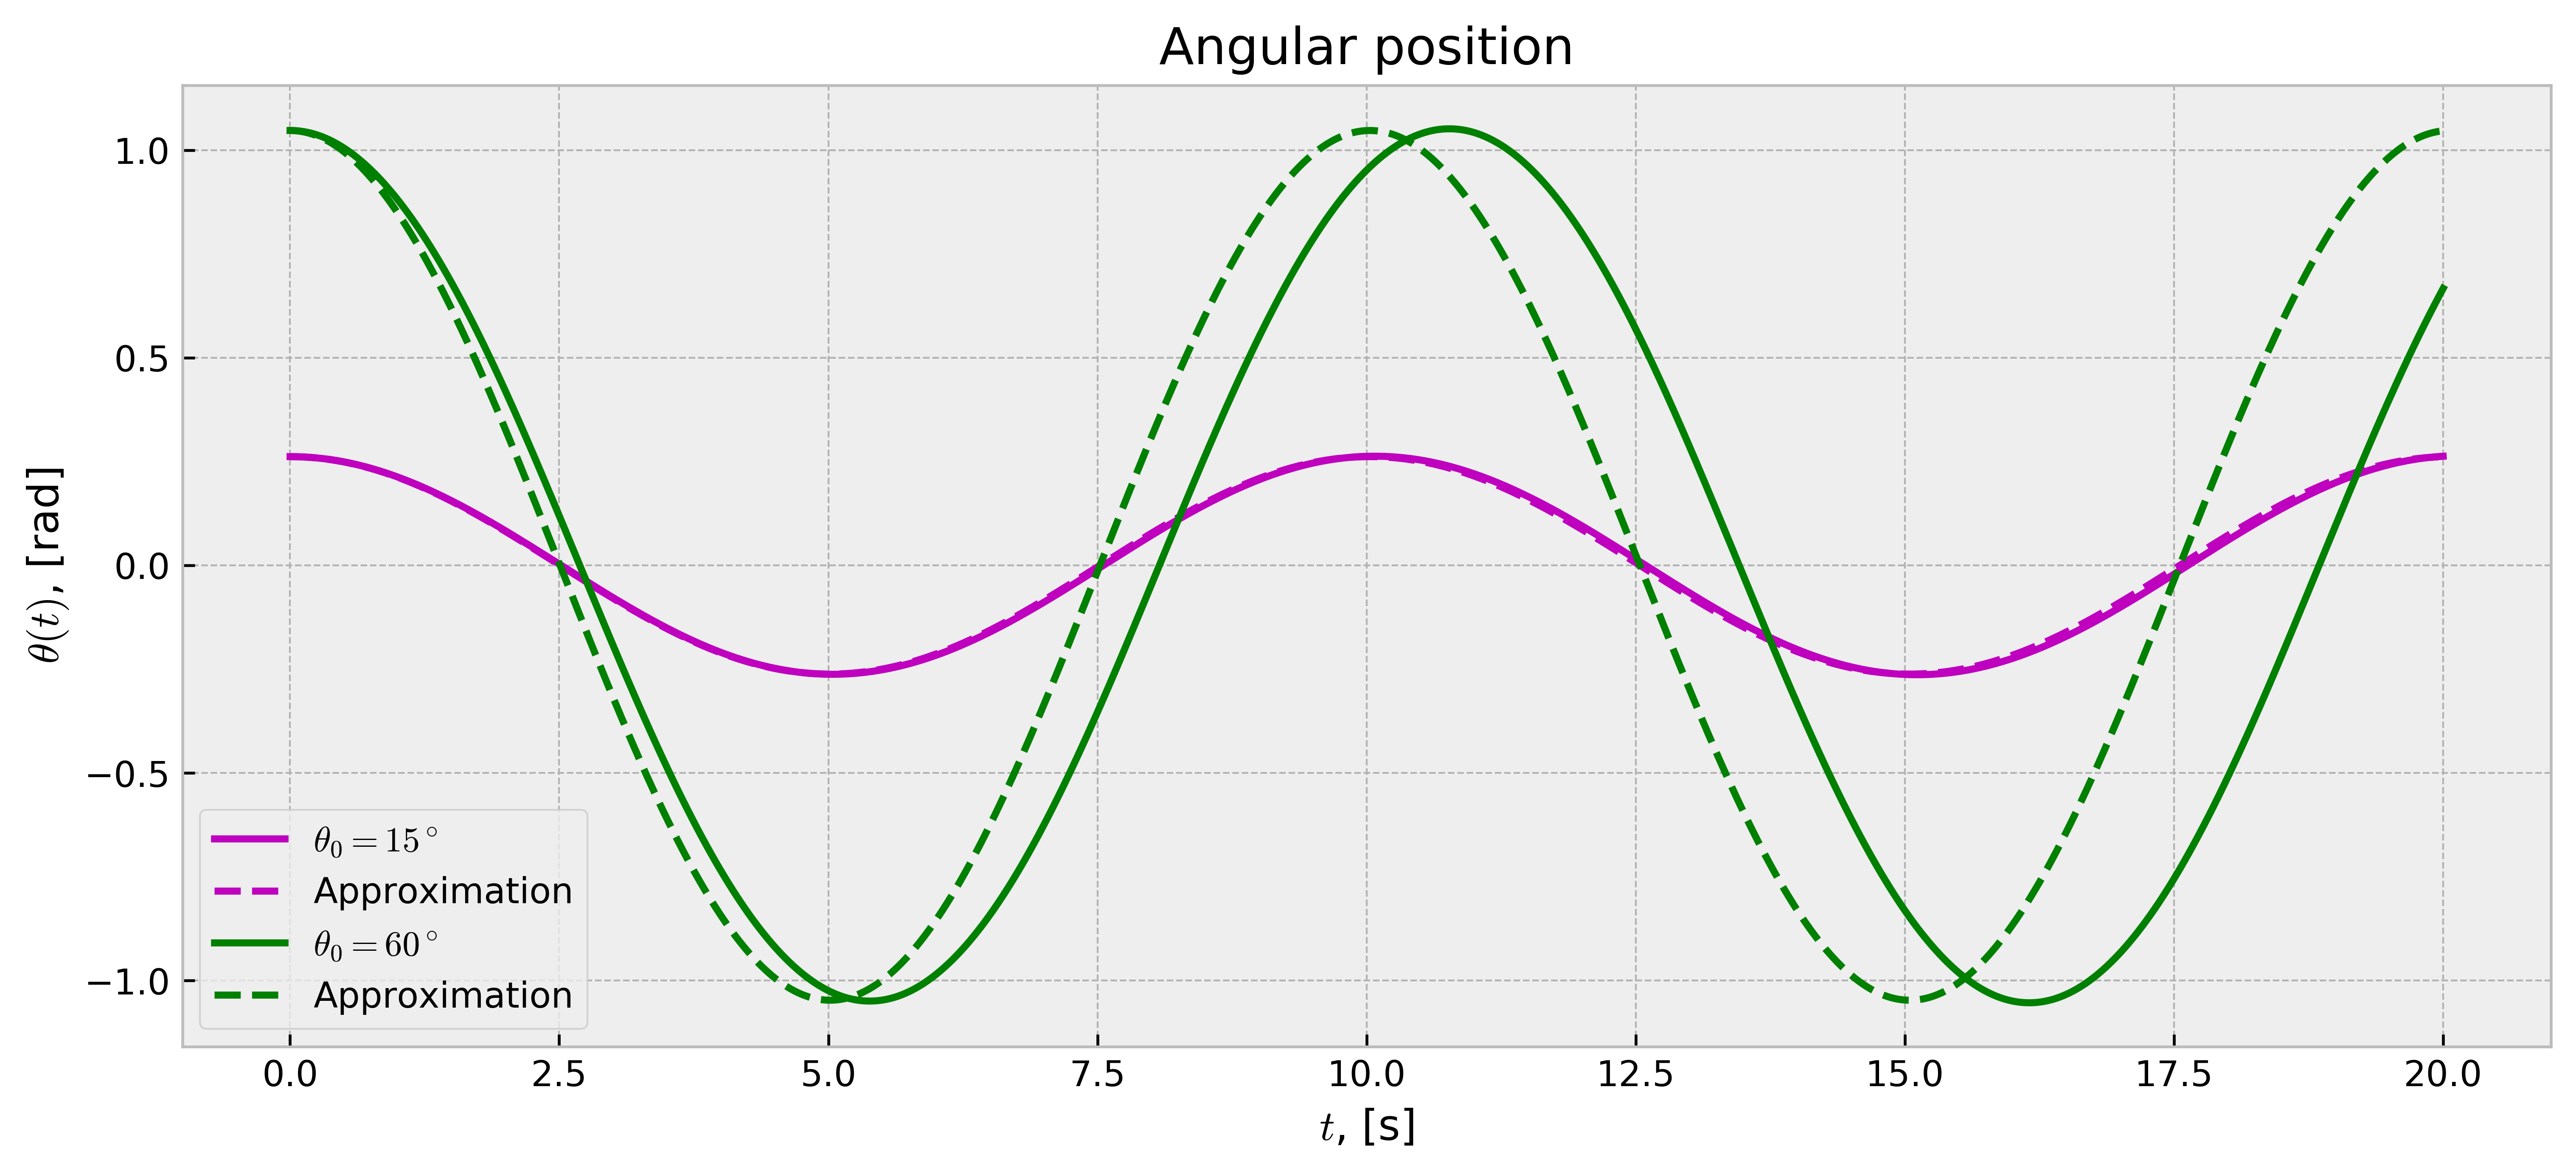

In [4]:
plt.figure(figsize=figsize, dpi=dpi)
plt.title("Angular position")
plt.plot(t, theta1, "m", label=r"$\theta_0=%.0f^\circ$"%(theta01*180/np.pi))
plt.plot(t, approx(t, theta01), "m--", label=r"Approximation")
plt.plot(t, theta2, "g", label=r"$\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t, approx(t, theta02), "g--", label=r"Approximation")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$\theta(t)$, [rad]")
plt.legend()
plt.show()

The approximation for the small initial angle is quite good, but as the initial angle increases the approximation becomes less accurate. In the case of the pendulum at NTNU, the amplitude is less that $15^\circ$.

## Conservation of Energy

The total mechanical energy,
\begin{equation}
E = U + K = mgL(1 - \cos\theta) + \frac{1}{2}mL^2\dot\theta^2,
\end{equation}
should be conserved. It thus serves as an excellent way to check if the time step used above was sufficiently small. Let's plot the kinetic energy for the largest initial angle.

In [5]:
def get_U(theta):
    """ Computes the potential energy. """
    return m*g*L*(1 - np.cos(theta))

def get_K(w):
    """ Computes the kinetic energy. """
    return 0.5*m*L**2*np.array(w)**2

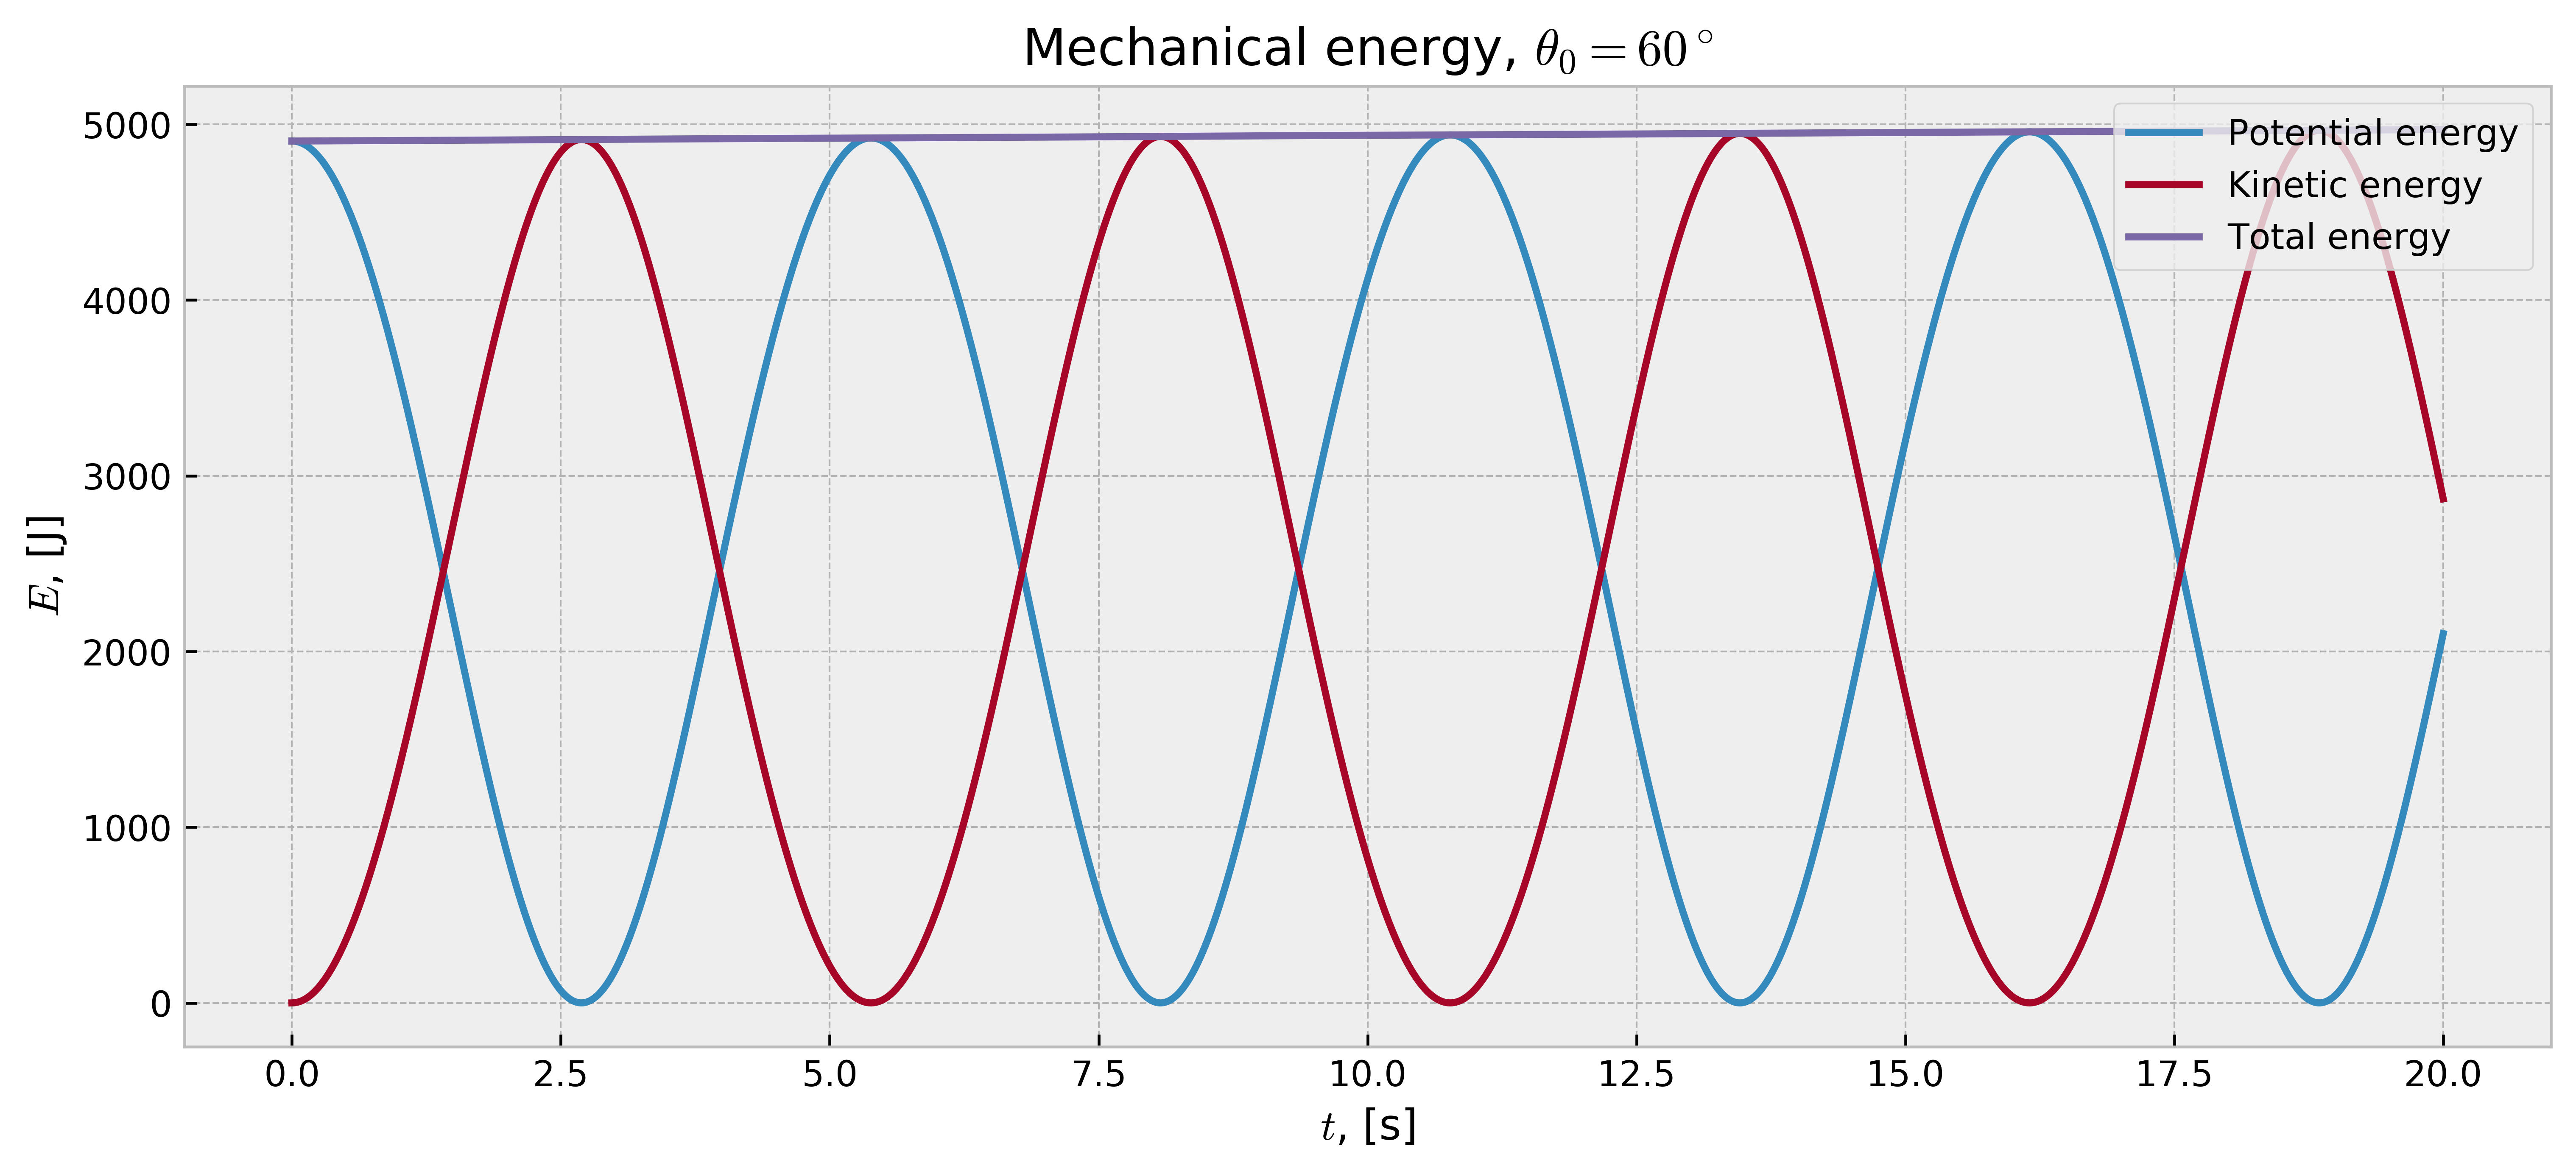

In [6]:
plt.figure(figsize=figsize, dpi=dpi)
plt.title(r"Mechanical energy, $\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t, get_U(theta2), label=r"Potential energy")
plt.plot(t, get_K(w2), label=r"Kinetic energy")
plt.plot(t, get_U(theta2) + get_K(w2), label=r"Total energy")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$E$, [J]")
plt.legend(loc=1)
plt.show()

The change in the total energy is minute, and we may thus conclude that the time step was sufficiently small. In order to be a bit more precise, we check that the relative change is small:

In [7]:
def get_error(theta, w):
    """ Computes the relatice error. """
    E0 = get_U(theta[0]) + get_K(w[0])
    E1 = get_U(theta[-1]) + get_K(w[-1])
    return np.abs((E0 - E1)/E0)

print("Relative change in E:")
print("Theta = %.0f: %.2e"%(theta01*180/np.pi, get_error(theta1, w1)))
print("Theta = %.0f: %.2e"%(theta02*180/np.pi, get_error(theta2, w2)))

Relative change in E:
Theta = 15: 1.56e-02
Theta = 60: 1.33e-02


## Damped Pendulum

A real pendulum cannot oscillate forever. Due to friction, the pendulum will eventually slow down and stop. At low velocities, the air resistance is proportional to the velocity, $f = -b\dot \theta$ [1, 2]. The differential equation describing this pendulum is described by
\begin{equation}
L\ddot \theta - \frac{b}{m}\dot \theta + g\sin\theta = 0.
\label{eq:diff_damped}
\end{equation}
As before, the equation has an analytical solution for $\theta \ll 1$. This is left as an exercise for the reader.

In the same manner as we did for equation \eqref{eq:diff}, we find the approximate form
\begin{equation}
\begin{aligned}
\Delta\omega &= -\frac{g}{L}\sin\theta\;\Delta t + \frac{b}{Lm}\omega,\\
\Delta\theta &= \omega\;\Delta t.
\end{aligned}\label{eq:numdiff_damped}
\end{equation}
We only need to change the function `RHS` to implement this.

In [8]:
def RHS(theta, w, dt):
    """ Return the right hand side of the 
    ordinary differential equation describing
    a damped simple pendulum.
    """
    dw = -np.sin(theta)*dt*g/L - b/(L*m)*w*dt
    dtheta = w*dt
    return dtheta, dw

Consider $L=1\;\mathrm{m}$, $m=1\;\mathrm{kg}$ and $b=1\;\mathrm{kg\;m}$. Try other values by yourself! For fun, let the ball have an initial velocity.

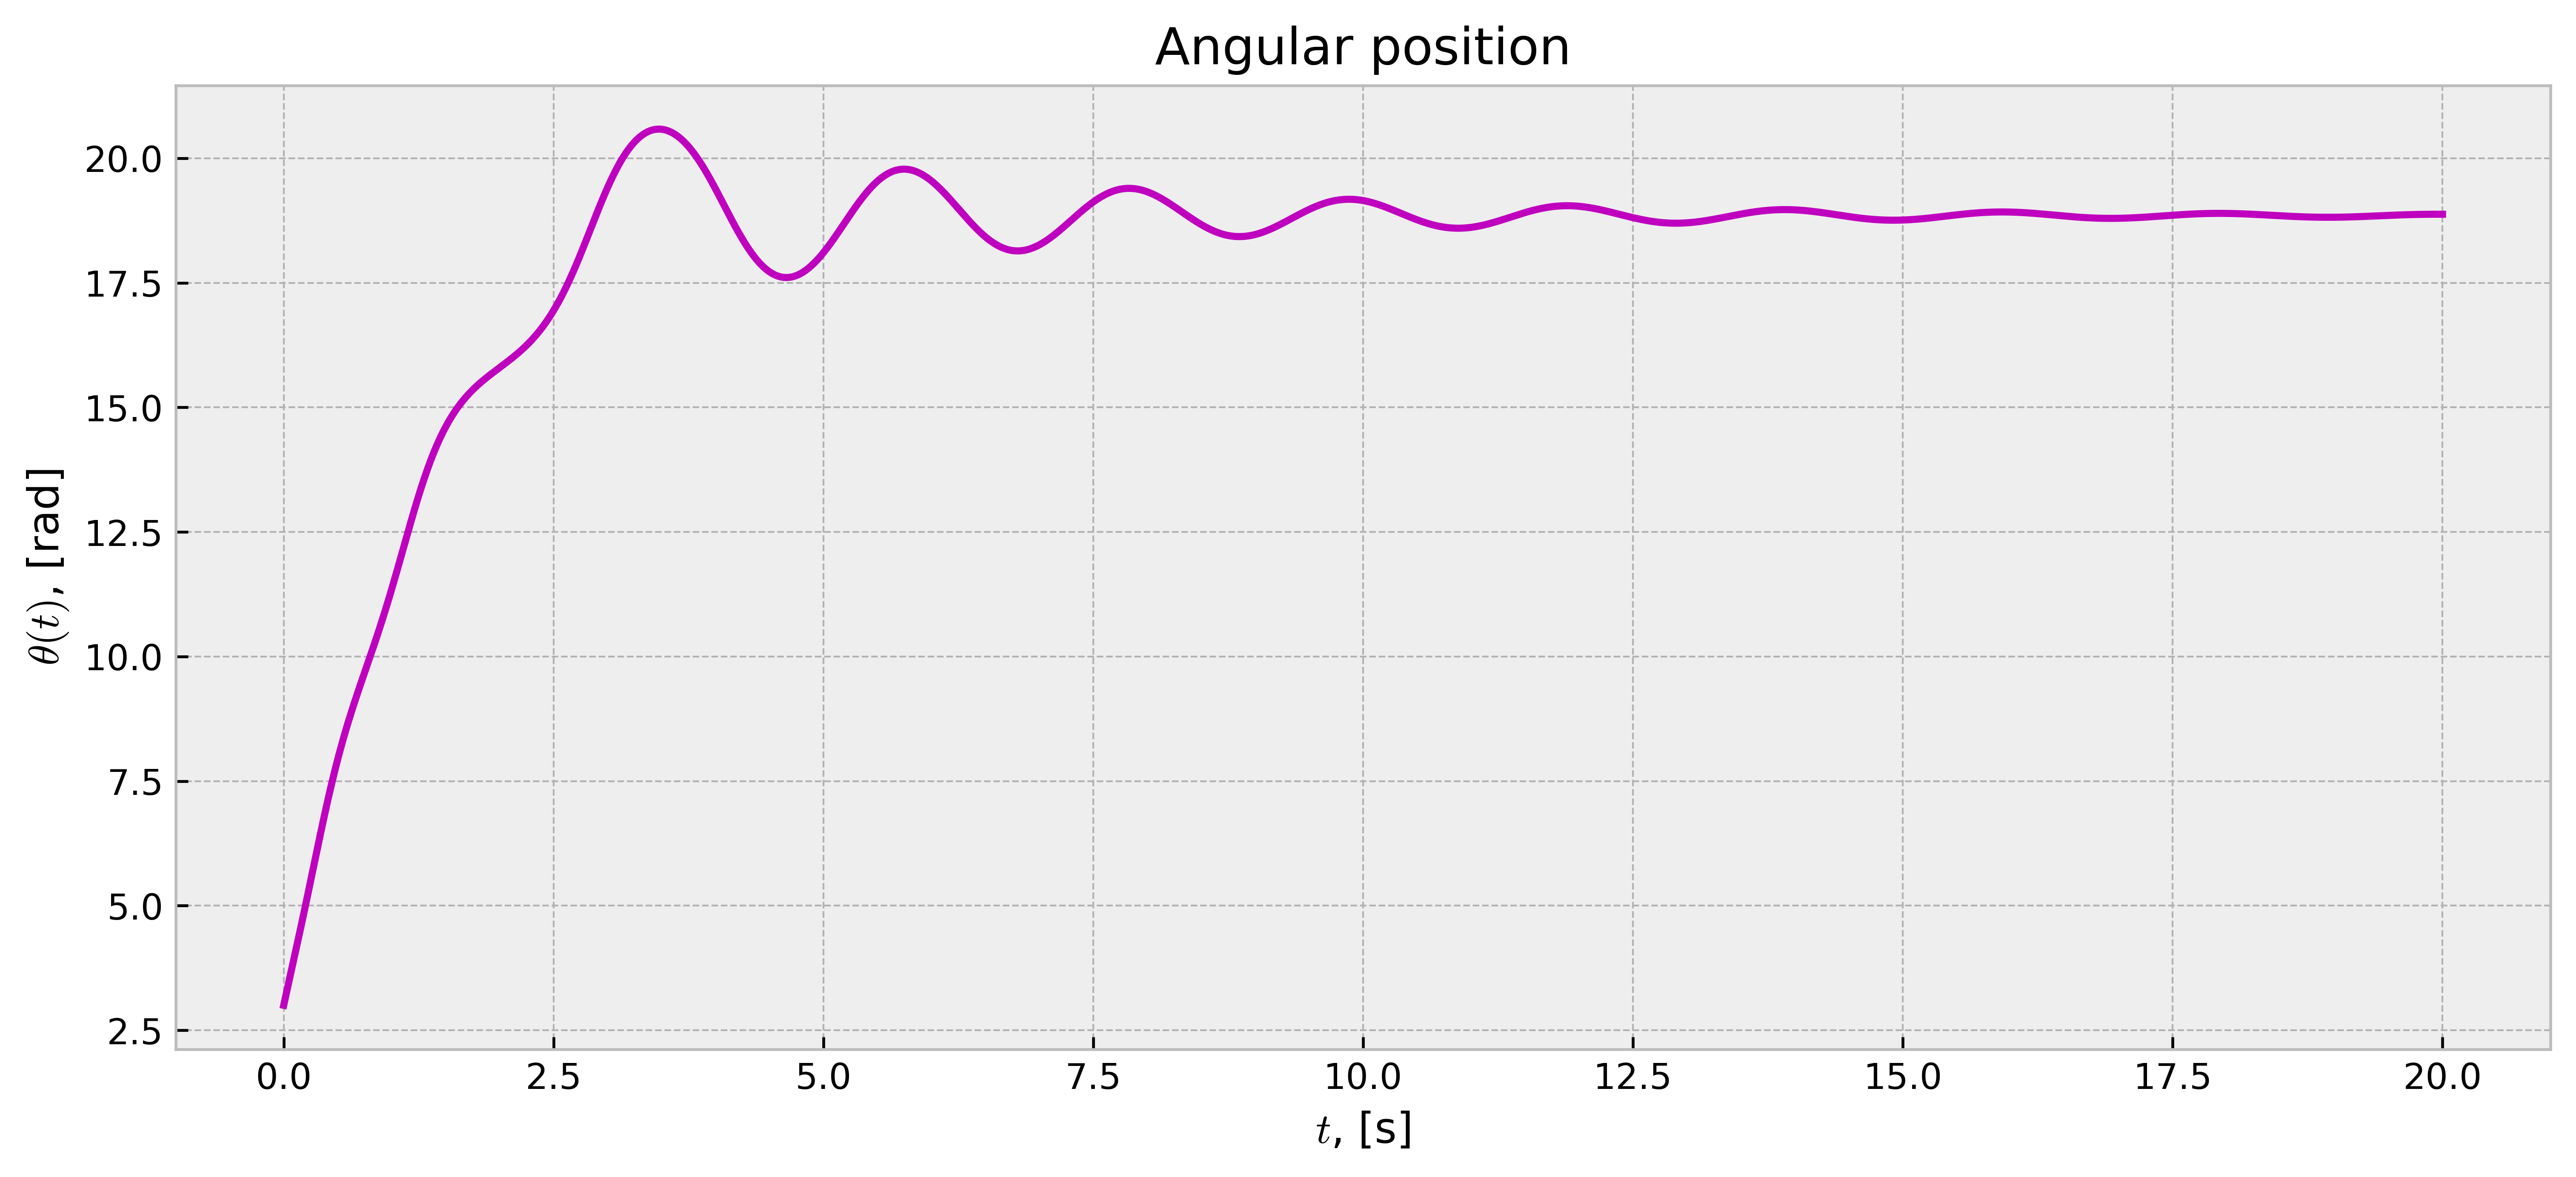

In [9]:
g = 9.81    # m/s^2. Gravitational acc
m = 1.      # kg. Mass
L = 1.      # m. Length of rod
w0 = 10     # 1/s. Initial angular velocity
theta0 = 3. # rad. Initial angle
T = 20.     # s. Time of simulation
n = 100000  # Number of steps
b = .5      # kg m. Damping factor

t = np.linspace(0, T, n + 1)
theta, _ = euler_method(theta0, w0, T/float(n), n)

plt.figure(figsize=figsize, dpi=dpi)
plt.title("Angular position")
plt.plot(t, theta, "m")
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"$\theta(t)$, [rad]")
plt.show()

**Exercise: ** Check that the sum of the mechanical energy and the dissipated energy is approximately constant in the simulation.

**Exercise: ** Solve equation \eqref{eq:diff_damped} for $\theta \ll 1$. What is the difference between underdamped and overdamped oscillations?

## Animation

We end this notebook by creating an animation!

In [10]:
x = np.sin(theta)
y = -np.cos(theta)

from matplotlib import animation
from IPython.display import HTML
FPS=30
plt.style.use('default')

# Set up the figure
fig = plt.figure(figsize=(4, 4), dpi=60)
ax = plt.axes(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
ax.set_aspect('equal')
ax.axis('off')

# Define the different elements in the animation
rod, = ax.plot([], [], color="grey", linewidth=2)
ball = plt.Circle((x[0], y[0]), 0.1, fc="grey")
ax.add_patch(ball)

# Calculates the number of frames
framesNum = int(FPS*t[-1])

# Animation function. This is called sequentially.
def animate(j):
    i = j*int(n/framesNum)
    ball.center = (x[i], y[i])
    rod.set_data([0, x[i]], [0, y[i]])

# Create animation
anim = animation.FuncAnimation(fig, animate, frames=framesNum, interval=1000/FPS)

plt.close(anim._fig)

# Display the animation
HTML(anim.to_html5_video())